# Lo sviluppo delle Startup italiane durante i primi anni di vita

In questo progetto verrà analizzato lo sviluppo di 331 Startup italiane lungo le dimensioni della crescita dimensionale e della redditività attraverso l'ausilio della PCA e verrà poi proposta una possibile classificazione di queste società attraverso l'ausilio dell'algoritmo Kmeans. 

Il campione preso in esame è stato ricavato dall'elenco delle Startup operanti in Italia; lista scaricata sul sito del Registro Imprese della Camera di Commercio al seguente __[link](https://startup.registroimprese.it/isin/static/startup/index.html?slideJump=32)__ in data 8 marzo 2021. Essa contiene informazioni in merito a 12291 società tra cui l'anno di iscrizione alla sezione delle Startup innovative, utilizzatto come anno di riferimento per i bilanci analizzati tramite l'ausilio della banca dati __[AIDA](https://www.bvdinfo.com/it-it/le-nostre-soluzioni/dati/nazionali/aida)__. Il campione esaminato è stato ricavato dall'insieme delle Startup italiane che svolgono attività di produzione di software, consulenza informatica e attività connesse (codice ATECO 62) per cui risultano disponibili dalla banca dati AIDA almeno tre bilanci consecutivi successivi all'anno di iscrizione nella sezione delle Startup. 

## Introduzione

Il dataset ricavato da AIDA contiene informazioni su indicatori economici-finanziari per 371 società in merito ai tre bilanci successivi alla data di iscrizione delle imprese nella sezione delle Startup. Nello specifico presenta per ogni bilancio i 3 indicatori di crescita maggiormente utilizzati in letteratura, quali vendite, dipendenti e totale attivo, e 5 indicatori finanziari, quali valore aggiunto, risultato netto, risultato operativo, risultato ante imposte e cash flow. Infatti, presi congiuntamente crescita e rendimenti finanziari forniscono un'ottima descrizione dei risultati raggiunti da un'impresa. A queste poste di bilancio sono state aggiunte anche le seguenti variabili identificative:
- **ragione sociale**:  nome della società
- **anno iscrizione**:  identiifica l'anno di iscrizione della società alla sezione delle Startup
- **anni disponibili**: presenta il numero di bilanci disponibili successivi all'anno di iscrizione della società alla sezione delle Startup
- **codice fiscale**:  codice identificativo di ogni società composto da 11 cifre

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) 

df = pd.read_excel('index.xlsx', converters= {'codice fiscale':str}) # converto la variabile 'codice fiscale' in stringa per
# evitare che venga trasformato in un numero e si modifichi il suo valore
df.head()

,ragione sociale,anno iscrizione,anni disponibili,codice fiscale,Totale Attività\nmigl EUR -\n1,Totale Attività\nmigl EUR -\n2,Totale Attività\nmigl EUR -\n3,Ricavi delle vendite\nmigl EUR -\n1,Ricavi delle vendite\nmigl EUR -\n2,Ricavi delle vendite\nmigl EUR -\n3,Dipendenti\n1,Dipendenti\n2,Dipendenti\n3,Risultato Netto\nmigl EUR -\n1,Risultato Netto\nmigl EUR -\n2,Risultato Netto\nmigl EUR -\n3,Risultato Operativo\nmigl EUR -\n1,Risultato Operativo\nmigl EUR -\n2,Risultato Operativo\nmigl EUR -\n3,Risultato Ante Imposte\nmigl EUR -\n1,Risultato Ante Imposte\nmigl EUR -\n2,Risultato Ante Imposte\nmigl EUR -\n3,Valore Aggiunto\nmigl EUR -\n1,Valore Aggiunto\nmigl EUR -\n2,Valore Aggiunto\nmigl EUR -\n3,Cash Flow\n1,Cash Flow\n2,Cash Flow\n3
0,RECLIFE S.R.L.,2014,3,02831050808,18.795,18.954,6.974,0.000,3.000,0.150,1,0,0,-2.363,1.662,-0.725,-2.363,1.662,-0.266,-2.363,1.662,-0.266,66.831,2.347,-0.266,-2.363,2.347,-0.725
1,MED4FIT S.R.L.,2014,5,02833750801,24.344,20.217,18.936,0.000,0.000,0.000,1,1,1,-11.150,-9.287,-0.574,-11.111,-9.287,-0.578,-11.150,-9.287,-0.574,-7.392,-5.320,0.873,-7.457,-5.385,0.812
2,SMARTWORK S.R.L.,2014,3,03311690832,509.523,358.197,280.454,458.986,47.881,187.111,9,9,9,113.050,-24.669,37.431,168.444,-37.370,36.432,168.136,-38.443,36.110,399.051,132.113,359.873,195.644,91.478,169.499
3,XOKO S.R.L.,2014,5,05287350655,145.527,225.812,559.137,45.000,44.366,247.199,1,2,3,-63.787,-100.560,-118.843,-83.237,-128.210,-136.640,-83.625,-128.997,-148.003,-73.154,-44.000,37.511,-61.658,-76.503,-29.361
4,RHEI SRL,2014,5,08874740965,52.084,179.520,210.600,249.094,289.093,437.100,0,0,2,3.603,3.294,2.360,7.702,8.325,5.907,7.371,7.715,5.201,8.686,12.018,47.991,4.587,6.987,9.320


Cambio il nome delle colonne in modo da identificare più facilmente ogni posta di bilancio e l'anno di riferimento successivo all'anno di iscrizione della società alla sezione delle Startup.

In [3]:
def change_name(x):
    new_columns = {}
    for column in x:
            name = column.replace('\nmigl EUR','').replace('\n','_').replace(' -','').replace(' ','_').lower()
            new_columns[column] = name
    return new_columns

new_columns = change_name(df.columns)
df.rename(columns = new_columns, inplace = True)

df.columns

Index(['ragione_sociale', 'anno_iscrizione', 'anni_disponibili',
       'codice_fiscale', 'totale_attività_1', 'totale_attività_2',
       'totale_attività_3', 'ricavi_delle_vendite_1', 'ricavi_delle_vendite_2',
       'ricavi_delle_vendite_3', 'dipendenti_1', 'dipendenti_2',
       'dipendenti_3', 'risultato_netto_1', 'risultato_netto_2',
       'risultato_netto_3', 'risultato_operativo_1', 'risultato_operativo_2',
       'risultato_operativo_3', 'risultato_ante_imposte_1',
       'risultato_ante_imposte_2', 'risultato_ante_imposte_3',
       'valore_aggiunto_1', 'valore_aggiunto_2', 'valore_aggiunto_3',
       'cash_flow_1', 'cash_flow_2', 'cash_flow_3'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ragione_sociale           371 non-null    object 
 1   anno_iscrizione           371 non-null    int64  
 2   anni_disponibili          371 non-null    int64  
 3   codice_fiscale            371 non-null    object 
 4   totale_attività_1         371 non-null    float64
 5   totale_attività_2         371 non-null    float64
 6   totale_attività_3         371 non-null    float64
 7   ricavi_delle_vendite_1    371 non-null    float64
 8   ricavi_delle_vendite_2    371 non-null    float64
 9   ricavi_delle_vendite_3    371 non-null    float64
 10  dipendenti_1              371 non-null    object 
 11  dipendenti_2              371 non-null    object 
 12  dipendenti_3              371 non-null    object 
 13  risultato_netto_1         371 non-null    float64
 14  risultato_

E' possibile notare come in ognuno dei tre anni esaminati le variabili che esprimono il numero dei dipendeti non siano considerate di tipo *float* come le altre variabili, ma *object*. Andiamo perciò ad indagare i valori assunti da queste variabili.

In [5]:
print("Valori assunti dalla variabile 'dipendenti_1': ", '\n', df.dipendenti_1.value_counts())
print('\n')
print("Valori assunti dalla variabile 'dipendenti_2': ", '\n', df.dipendenti_2.value_counts())
print('\n')
print("Valori assunti dalla variabile 'dipendenti_3': ", '\n', df.dipendenti_3.value_counts())

Valori assunti dalla variabile 'dipendenti_1':  
 0       158
1        85
2        39
3        22
4        13
6        11
n.d.     11
5        10
8         6
7         5
12        3
9         2
10        2
16        1
17        1
20        1
26        1
Name: dipendenti_1, dtype: int64


Valori assunti dalla variabile 'dipendenti_2':  
 0       135
1        74
2        37
3        28
n.d.     20
5        15
4        15
6        12
7         9
9         6
8         4
10        4
11        2
12        2
26        2
13        1
14        1
16        1
17        1
18        1
19        1
Name: dipendenti_2, dtype: int64


Valori assunti dalla variabile 'dipendenti_3':  
 0       137
1        52
2        41
3        28
4        21
n.d.     17
7        13
6        12
5        12
8         9
9         7
12        5
10        4
15        3
14        2
18        2
13        1
16        1
20        1
25        1
28        1
41        1
Name: dipendenti_3, dtype: int64


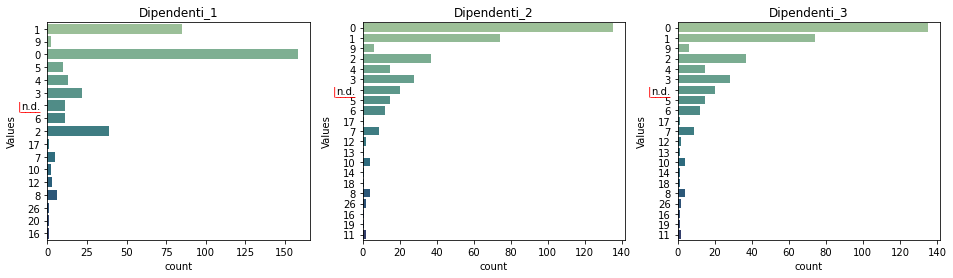

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(16,4))
sb.countplot(ax = ax1, y = df['dipendenti_1'], palette='crest', orient='h')
ax1.set_title('Dipendenti_1')
ax1.set_ylabel('Values')
ax1.text(x = -18.5, y = 6.2, s = '|____', color = 'r')

sb.countplot(ax = ax2, y = df['dipendenti_2'], palette='crest', orient='h')
ax2.set_title('Dipendenti_2')
ax2.set_ylabel('Values')
ax2.text(x = -16, y = 6.3, s = '|____', color = 'r')

sb.countplot(ax = ax3, y = df['dipendenti_2'], palette='crest', orient='h')
ax3.set_title('Dipendenti_3')
ax3.set_ylabel('Values')
ax3.text(x = -16, y = 6.3, s = '|____', color = 'r')


plt.show()

Tra i valori assunti dalle tre variabili è presente con una certa frequenza il valore "n.d.", il quale non è stato rilevato da Pandas durante l'importazione del dataset come *missing value*. Convertiamo tale valore in *nan* e trasformiamo le variabili dei dipendenti in variabili di tipo *float*. 

In [7]:
for i in df[['dipendenti_1', 'dipendenti_2', 'dipendenti_3']]:
                 df[i].mask(df[i] == 'n.d.', inplace=True)     

df[['dipendenti_1', 'dipendenti_2', 'dipendenti_3']] = df[['dipendenti_1', 'dipendenti_2', 'dipendenti_3']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ragione_sociale           371 non-null    object 
 1   anno_iscrizione           371 non-null    int64  
 2   anni_disponibili          371 non-null    int64  
 3   codice_fiscale            371 non-null    object 
 4   totale_attività_1         371 non-null    float64
 5   totale_attività_2         371 non-null    float64
 6   totale_attività_3         371 non-null    float64
 7   ricavi_delle_vendite_1    371 non-null    float64
 8   ricavi_delle_vendite_2    371 non-null    float64
 9   ricavi_delle_vendite_3    371 non-null    float64
 10  dipendenti_1              360 non-null    float64
 11  dipendenti_2              351 non-null    float64
 12  dipendenti_3              354 non-null    float64
 13  risultato_netto_1         371 non-null    float64
 14  risultato_

Oltre ai valori per il numero dei dipendenti in tutti e tre gli anni, nel dataset sono mancanti anche tre valori per il cash flow nel primo anno. Andiamo a creare una copia del nostro dataset iniziale ed eliminiamo le righe dove sono assenti dei valori.

In [8]:
DF = df.copy()

DF.dropna(axis = 0, inplace = True)

In [9]:
DF.describe()

,anno_iscrizione,anni_disponibili,totale_attività_1,totale_attività_2,totale_attività_3,ricavi_delle_vendite_1,ricavi_delle_vendite_2,ricavi_delle_vendite_3,dipendenti_1,dipendenti_2,dipendenti_3,risultato_netto_1,risultato_netto_2,risultato_netto_3,risultato_operativo_1,risultato_operativo_2,risultato_operativo_3,risultato_ante_imposte_1,risultato_ante_imposte_2,risultato_ante_imposte_3,valore_aggiunto_1,valore_aggiunto_2,valore_aggiunto_3,cash_flow_1,cash_flow_2,cash_flow_3
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2015.719033,3.308157,251.780625,392.107366,522.775384,127.784006,204.983486,282.726054,1.876133,2.435045,2.966767,-19.440843,-22.549852,-40.612372,-18.910529,-19.352574,-33.015441,-19.280139,-21.448653,-35.970719,36.005550,74.091982,104.738921,-5.611795,4.201900,4.089909
std,0.541799,0.500206,506.175247,779.962595,1026.453088,251.298457,374.632687,503.250161,3.092474,3.722720,4.615729,114.653593,182.901846,306.655137,120.223179,198.336981,318.475036,122.557796,197.865693,319.413332,115.968686,182.394504,285.211635,101.881458,169.100579,291.255276
min,2014.000000,3.000000,0.090000,1.611000,0.286000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1068.599000,-1712.509000,-3471.490000,-1075.892000,-1768.807000,-3425.443000,-1068.599000,-1712.509000,-3432.812000,-564.919000,-686.556000,-1710.325000,-928.880000,-1553.111000,-3238.692000
25%,2015.000000,3.000000,32.324500,56.257000,73.980500,3.490000,14.485000,24.173000,0.000000,0.000000,0.000000,-13.254000,-13.940000,-14.044500,-13.567000,-14.943500,-11.882000,-14.321000,-16.525000,-12.220000,-2.595000,-1.001000,1.833500,-6.885500,-3.967500,-2.017500
50%,2016.000000,3.000000,95.511000,144.862000,213.856000,45.000000,76.500000,101.542000,1.000000,1.000000,1.000000,0.085000,0.467000,1.136000,0.523000,1.323000,3.283000,0.365000,0.888000,2.554000,10.697000,22.335000,42.659000,2.845000,6.161000,10.891000
75%,2016.000000,4.000000,246.351000,383.179000,524.886000,136.854500,254.946000,298.195500,2.000000,3.000000,4.000000,5.884000,10.903500,16.895500,9.516500,15.226000,25.421000,9.047500,13.745000,22.642000,47.099500,99.713000,134.789000,16.244000,33.499000,48.974000
max,2017.000000,5.000000,5106.500000,10279.474000,12934.521000,2182.328000,3237.680000,3815.210000,26.000000,26.000000,41.000000,277.460000,818.636000,1590.664000,193.192000,1065.391000,2241.541000,308.228000,1062.683000,2237.877000,852.975000,1180.316000,2475.264000,314.072000,915.616000,1787.811000


##  PCA sulle poste di bilancio

### Creazione del dataset per la PCA

In [10]:
df_anni = [] 

for anno in [1, 2, 3]:
    # aggiungo le 10 variabili da analizzare riferite al medesimo anno di bilancio: 
    df_anno = DF.iloc[:, [i for i in range(3+anno, 28, 3)]].copy()
    df_anno.columns = df_anno.columns.str.replace('_'+str(anno),'') #rinomino le varibili senza il riferimento all'anno
    
    # aggiungo l'anno del bilancio a cui si riferisce ogni dataset creato:
    df_anno.insert(0, 'anno', anno) 
    
    # aggiungo una colonna contenente l'indice dell'impresa e l'anno del bilancio:
    indice_anno = []
    for i in np.arange(1, len(DF)+1):
        indice_anno.append(str(i) + '_' + str(anno))
    df_anno.insert(1, 'indice_anno', indice_anno)
    
    # aggiungo il codice fiscale per identiifcare univocamente ogni impresa:
    df_anno.insert(2, 'codice_fiscale', DF['codice_fiscale'].copy().astype(str))
    
    df_anni.append(df_anno)
    
DF_PCA = pd.concat([df_anni[0], df_anni[1], df_anni[2]])
DF_PCA.sort_index(inplace=True)
DF_PCA.index = list(range(len(DF_PCA)))

DF_PCA

,anno,indice_anno,codice_fiscale,totale_attività,ricavi_delle_vendite,dipendenti,risultato_netto,risultato_operativo,risultato_ante_imposte,valore_aggiunto,cash_flow
0,1,1_1,02831050808,18.795,0.000,1.0,-2.363,-2.363,-2.363,66.831,-2.363
1,3,1_3,02831050808,6.974,0.150,0.0,-0.725,-0.266,-0.266,-0.266,-0.725
2,2,1_2,02831050808,18.954,3.000,0.0,1.662,1.662,1.662,2.347,2.347
3,1,2_1,02833750801,24.344,0.000,1.0,-11.150,-11.111,-11.150,-7.392,-7.457
4,3,2_3,02833750801,18.936,0.000,1.0,-0.574,-0.578,-0.574,0.873,0.812
...,...,...,...,...,...,...,...,...,...,...,...
988,2,330_2,14113281001,1618.628,1901.688,9.0,225.055,275.930,274.748,806.007,344.048
989,1,330_1,14113281001,860.205,862.751,4.0,163.223,193.192,191.427,389.855,239.123
990,1,331_1,14356531005,119.899,146.249,0.0,2.521,8.585,7.073,28.168,22.104
991,2,331_2,14356531005,237.522,242.035,1.0,-22.723,-18.518,-20.056,91.826,40.098


### Analisi delle componenti principali

Siccome le poste di bilancio da utilizzare hanno varianze molto differenti, basti pensare al numero di dipendenti ed il totale attivo, standardizzo le variabili prima di svolgere la PCA.

In [21]:
from sklearn.preprocessing import StandardScaler

x = DF_PCA.iloc[:,3:].copy() 
x_standard = StandardScaler().fit_transform(x)

x_standard

array([[-0.45914952, -0.51978714, -0.36742537, ...,  0.10179033,
        -0.02296379, -0.01604972],
       [-0.47381505, -0.51940711, -0.6250902 , ...,  0.11098956,
        -0.34522955, -0.0079764 ],
       [-0.45895226, -0.5121866 , -0.6250902 , ...,  0.11944741,
        -0.33267936,  0.00716475],
       ...,
       [-0.33371651, -0.14926327, -0.6250902 , ...,  0.14318466,
        -0.20866153,  0.1045423 ],
       [-0.18778947,  0.09341188, -0.36742537, ...,  0.02417376,
         0.09708678,  0.19323044],
       [ 0.37078715, -0.20023251, -0.10976055, ..., -0.90743123,
        -0.4618652 , -0.69364111]])

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(x_standard)

cumsum = np.cumsum(pca.explained_variance_ratio_)
eigenvalue = pca.explained_variance_

print('Varianza cumulata dalle componenti: ', '\n', cumsum)
print('-------------------------------------------------')
print('Valore assunto dagli autovalori: ', '\n', eigenvalue)

Varianza cumulata dalle componenti:  
 [0.59779302 0.86598544 0.93495848 0.98440182 0.99390282 0.99903164
 0.99987891 1.        ]
-------------------------------------------------
Valore assunto dagli autovalori:  
 [4.78716507e+00 2.14770220e+00 5.52340573e-01 3.95945452e-01
 7.60845756e-02 4.10719427e-02 6.78500320e-03 9.69700485e-04]


Le prime due componenti della PCA spiegano una percentuale consistente della varianza presenta nel dataset (87%) e la regola di Kaiser suggerisce la rilevanza delle prime due componenti. Andiamo a visualizzare la relazione esistente tra le prime due componenti principali e le 8 poste di bilancio analizzate al fine di poter interpretare le dimensioni ricavate dalla PCA.

In [92]:
pca_2 = PCA(2)
principal_components_2 = pca_2.fit_transform(x_standard)

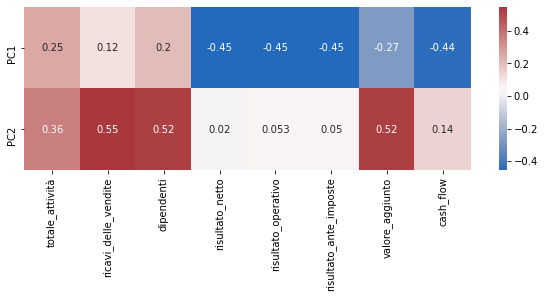

In [93]:
comps = pd.DataFrame(pca_2.components_, columns= DF_PCA.columns[3:]).copy()
plt.figure(figsize= (10,3))
sb.heatmap(comps, cmap="vlag", annot=True, yticklabels=['PC1', 'PC2']);

Dal grafico la prima componente principale risulta correlata negativamente con gli indicatori di performance finanziaria, perciò è stata identificata come una misura di redditività per le Startup, mentre la seconda componente principale appare maggiormente correlata positivamente con gli indicatori di crescita, perciò è stata identificata come una misura di crescita aziendale.

## Classificazione delle Startup a seconda delle proprie traiettorie di crescita

Per comprendere il movimento delle società sulla mappa fattoriale dei tre anni creata, utilizzo i valori ottenuti dalla PCA sulle due componenti principali per svolgere una classificazione delle traiettorie seguite dalle Startup. Rielaboro nuovamente il dataset aggiungendo quindi tali valori per ogni impresa nei rispettivi anni.

In [94]:
df_PCs = pd.DataFrame(principal_components_2, columns = ['principal_component_1', 'principal_component_2'])
df_PCs.insert(0,'codice_fiscale', DF_PCA['codice_fiscale'].copy())
df_PCs.insert(0,'indice_anno', DF_PCA['indice_anno'].copy())
df_PCs.insert(0,'anno', DF_PCA['anno'].copy())
df_PCs.head()

,anno,indice_anno,codice_fiscale,principal_component_1,principal_component_2
0,1,1_1,02831050808,-0.379417,-0.642547
1,3,1_3,02831050808,-0.363897,-0.948412
2,2,1_2,02831050808,-0.381984,-0.929277
3,1,2_1,02833750801,-0.217435,-0.834866
4,3,2_3,02833750801,-0.311891,-0.804846


In [95]:
df_anni = [] 

for anno in [1, 2, 3]:
    df_anno = df_PCs[df_PCs['anno']==anno].copy()
    df_anno.reset_index(inplace=True, drop=True)
    df_anno.columns= ['anno','indice_anno','codice_fiscale',str(anno)+'_PC1', str(anno)+'_PC2']

    df_anni.append(df_anno)


df_PCs = pd.concat([df_anni[0], df_anni[1].iloc[:,3:], df_anni[2].iloc[:,3:]], join='outer', axis=1)
df_PCs

,anno,indice_anno,codice_fiscale,1_PC1,1_PC2,2_PC1,2_PC2,3_PC1,3_PC2
0,1,1_1,02831050808,-0.379417,-0.642547,-0.381984,-0.929277,-0.363897,-0.948412
1,1,2_1,02833750801,-0.217435,-0.834866,-0.237139,-0.829014,-0.311891,-0.804846
2,1,3_1,03311690832,-1.451867,2.351537,0.059896,0.864613,-0.812348,1.689498
3,1,4_1,05287350655,0.434281,-0.960130,0.762940,-0.751918,0.865220,0.042284
4,1,5_1,08874740965,-0.340058,-0.553832,-0.298945,-0.431431,-0.181296,0.147099
...,...,...,...,...,...,...,...,...,...
326,1,327_1,09868270969,-0.390681,-0.676447,-0.480026,-0.480712,-0.318055,-0.205234
327,1,328_1,09888350965,-1.394122,-0.156172,-0.238393,-0.762816,-0.576633,-0.420251
328,1,329_1,11716270019,0.036802,0.288431,0.851576,2.105569,0.393177,5.507630
329,1,330_1,14113281001,-1.766950,2.416749,-2.187857,6.027853,-2.841709,9.057273


Ora posso applicare l'algoritmo Kmeans per classificare le Startup a seconda dei valori assunti nel tempo sulle due componenti principali.

In [97]:
from sklearn.cluster import KMeans

x_kmeans = df_PCs.iloc[:,3:].copy()

KMeans = KMeans(n_clusters=3, random_state=1000)
clusters = KMeans.fit_predict(x_kmeans) 

df_PCs['clusters'] = clusters

In [99]:
a = np.array([])
b = np.array([])
c = np.array([])

for i in clusters:
    if i == 0:
        a = np.append(a, i)
    elif i == 1:
        b = np.append(b, i)
    elif i == 2: 
        c = np.append(c, i)
        
print("Numero di startup per ogni gruppo:")
print('GROUP 0:', len(a))
print('GROUP 1:', len(b))
print('GROUP 2:', len(c))

Numero di startup per ogni gruppo:
GROUP 0: 292
GROUP 1: 33
GROUP 2: 6


Al fine di comprendere la classificazione svolta con Kmeans aggiungo nel dataset la colonna *clusters* e rielaboro il dataset al fine di visualizzare lo sviluppo nel tempo delle Startup lungo i tre anni anlizzati.

In [104]:
df_anni = [] 

for anno in [1, 2, 3]:
    df_anno = df_PCs[['codice_fiscale',str(anno)+'_PC1', str(anno)+'_PC2','clusters']].copy()
    df_anno.columns = ['codice_fiscale','PC1', 'PC2','clusters']
    df_anno['anno'] = anno
    
    df_anni.append(df_anno)

df_plot = pd.concat([df_anni[0], df_anni[1], df_anni[2]], join='outer')
df_plot.sort_values(['codice_fiscale', 'anno'], inplace=True)
df_plot.reset_index(inplace=True, drop=True)

In [105]:
import plotly.express as px

fig = px.scatter(df_plot.iloc[:len(df_plot) ,1:3], x='PC1', y='PC2', 
                 color=df_plot['clusters'][:n].astype(str),
                 #text=Db['anno'][:n], 
                 animation_frame=df_plot['anno'][:n],
                 color_discrete_sequence=["green","blue","red"]
                 )

fig.update_traces(textposition='top center')

fig.show();

Ricordando che la prima componente principale è negativamente correlata con la redditivià e la seconda è, invece, positivamente correlata con la crescita dimensionale, dal grafico è possibile comprendere i cluster calcolati come segue:
- **gruppo 0**: Startup con livelli di crescita e redditività stabili nel tempo che non presentano, però, particolari rendimenti lungo i tre anni presi in considerazione; 
- **gruppo 1**: Startup che evidenziano una condizione di grande sviluppo dimensionale e finanziario;
- **gruppo 2**: Startup che esibiscono discreti livelli di crescita, ma pessime performance finanziarie.